In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import dataset to use for map visualization
cl_real_happiness = pd.read_csv('./data/cl_real_happiness.csv')

# filter by country and then just picked max as min/max/mean all the same
cl_real_happiness_price = cl_real_happiness.groupby(by='country')['price_per_sq_meter (city)'].mean()
cl_real_happiness_price = cl_real_happiness_price.reset_index()

cl_real_happiness_life = cl_real_happiness.groupby(by='country')['Healthy life expectancy (country)'].max()
cl_real_happiness_life = cl_real_happiness_life.reset_index()

cl_real_happiness_social = cl_real_happiness.groupby(by='country')['Social support (country)'].max()
cl_real_happiness_social = cl_real_happiness_social.reset_index()

country_price_life = pd.merge(cl_real_happiness_price, cl_real_happiness_life, how='inner', on='country')
country_price_life_social = pd.merge(country_price_life, cl_real_happiness_social, how='inner', on='country')
country_price_life_social.dropna(inplace=True)
country_price_life_social.drop_duplicates(inplace=True)

print(country_price_life_social.head())

       country  price_per_sq_meter (city)  Healthy life expectancy (country)  \
0  Afghanistan                 486.063333                              52.59   
1      Albania                 887.849000                              68.71   
2      Algeria                 947.055789                              65.91   
5    Argentina                2172.734000                              68.80   
6      Armenia                1518.323333                              66.75   

   Social support (country)  
0                      0.47  
1                      0.67  
2                      0.80  
5                      0.90  
6                      0.76  


137
137
137
137


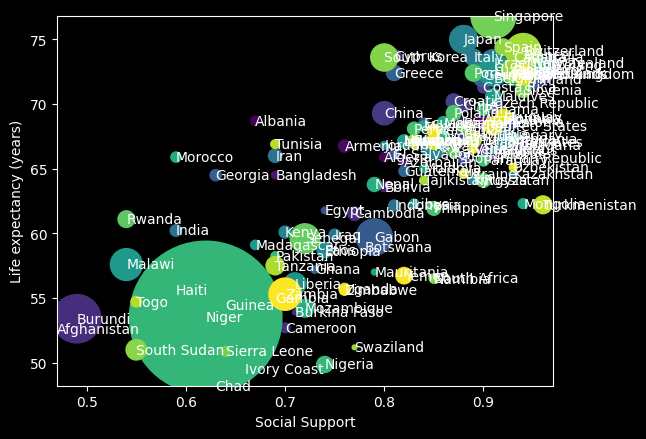

In [39]:

countries = list(country_price_life_social['country'].sort_values().unique())
print(len(countries))

price_per = np.array(list(country_price_life_social['price_per_sq_meter (city)']))
print(len(price_per))

life_exp = list(country_price_life_social['Healthy life expectancy (country)'])
print(len(life_exp))

social_supp = list(country_price_life_social['Social support (country)'])
print(len(social_supp))

fig = plt.figure()
ax = fig.add_subplot(111)
# Some random colours: 
colours = range(len(countries))
ax.scatter(social_supp, life_exp, c=colours, s=price_per/20)
ax.set_xlim(min(social_supp), max(social_supp))
ax.set_ylim(min(life_exp), max(life_exp))
ax.set_xlabel('Social Support')
ax.set_ylabel('Life expectancy (years)')

offset = 0
for x, y, s, country in zip(social_supp, life_exp, price_per, countries):
    ax.text(x+offset, y, country, va='center')

plt.show()